<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_42_Z_score_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
df.isna().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-10-d771415e5b9e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-10-d771415e5b9e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

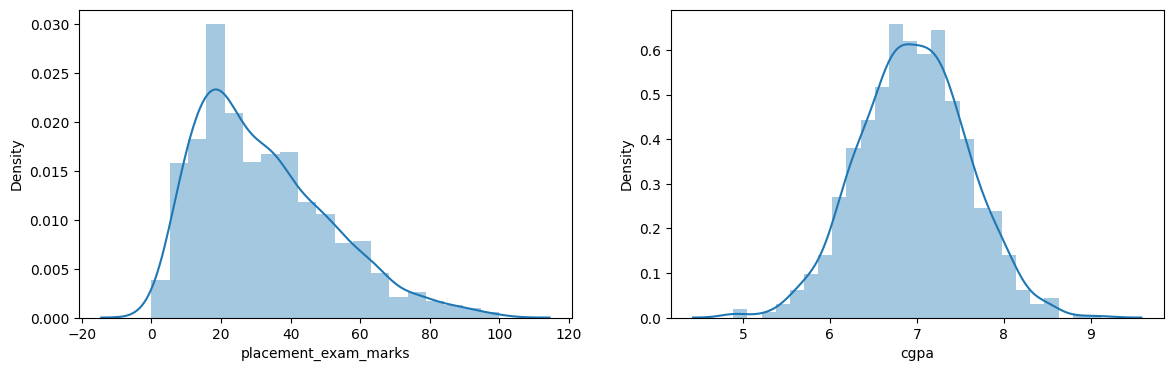

In [10]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.distplot(df['cgpa'])

By observing `placement_exam_marks` distribution, We can say that exam was hard because less student get goo marks.

So, we can only z-score to cgpa because it is normally disrtibuted but marks data is left skewed.

<Axes: >

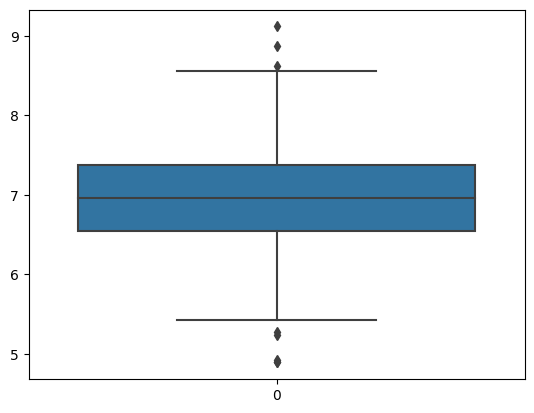

In [11]:
sns.boxplot(df['cgpa'])

In [12]:
upper = df.cgpa.mean()+ 3* df.cgpa.std()
lower = df.cgpa.mean()- 3* df.cgpa.std()

In [13]:
upper,lower

(8.808933625397168, 5.113546374602832)

In [16]:
df[(df['cgpa']> upper) | (df['cgpa']<lower)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# **Trimming**

In [19]:
new_df = df[(df['cgpa']< upper) & (df['cgpa']>lower)]

In [20]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# **Capping**

In [21]:
df['cgpa'] = np.where(df['cgpa']>upper,upper,np.where(df['cgpa']<lower, lower, df['cgpa']))

In [22]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


In [29]:
lower

5.113546374602832

In [23]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


<ipython-input-32-dd1eca269673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

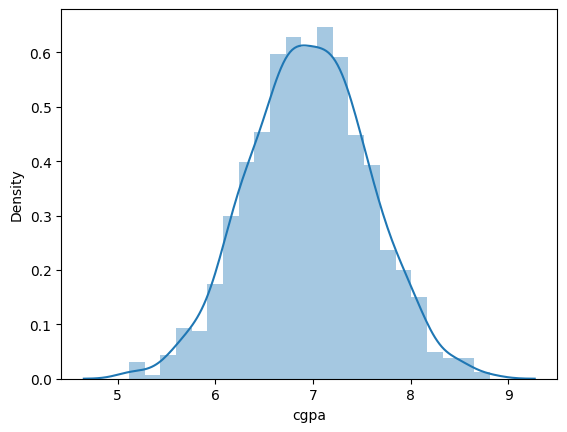

In [32]:
sns.distplot(df['cgpa'])

<Axes: >

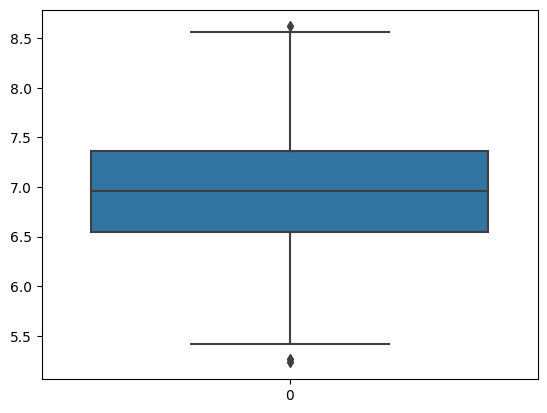

In [25]:
sns.boxplot(new_df['cgpa'])

In [27]:
df['z_score'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [28]:
df

,cgpa,placement_exam_marks,placed,z_score
0,7.190000,26.0,1,0.372949
1,7.460000,38.0,1,0.813630
2,7.540000,40.0,1,0.944202
3,6.420000,8.0,1,-0.883807
4,7.230000,17.0,0,0.438235
...,...,...,...,...
995,8.808934,44.0,1,3.015293
996,8.808934,65.0,1,3.015293
997,5.113546,34.0,0,-3.016137
998,8.620000,46.0,1,2.706925
